In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:

df = pd.read_csv('FuelConsumptionCo2.csv') 


In [3]:


X = df['ENGINESIZE'].values
y = df['CO2EMISSIONS'].values
m = len(y)  


In [4]:
theta_0 = 0
theta_1 = 0
alpha = 0.01
iterations = 1000


In [5]:

# Cost function
def compute_cost(theta_0, theta_1, X, y):
    predictions = theta_0 + theta_1 * X
    return (1/(2*m)) * np.sum((predictions - y) ** 2)


In [6]:

# Gradient descent
def gradient_descent(theta_0, theta_1, X, y, alpha, iterations):
    cost_history = []
    for _ in range(iterations):
        predictions = theta_0 + theta_1 * X
        error = predictions - y
        
       
        theta_0 -= alpha * (1/m) * np.sum(error)
        theta_1 -= alpha * (1/m) * np.sum(error * X)

        cost_history.append(compute_cost(theta_0, theta_1, X, y))
    return theta_0, theta_1, cost_history

# Run gradient descent
final_theta_0, final_theta_1, cost_history = gradient_descent(theta_0, theta_1, X, y, alpha, iterations)


In [7]:


print(f"Optimized theta_0: {final_theta_0:.4f}")
print(f"Optimized theta_1: {final_theta_1:.4f}")
print(f"Final cost: {cost_history[-1]:.4f}")


Optimized theta_0: 99.3063
Optimized theta_1: 45.7874
Final cost: 524.4660


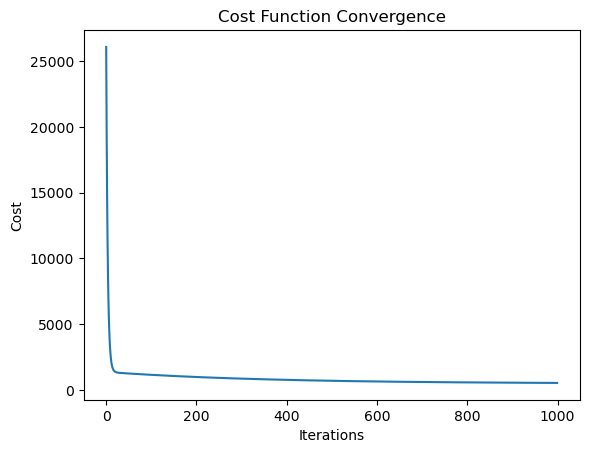

In [8]:

# Plot cost function convergence
plt.plot(range(iterations), cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function Convergence')
plt.show()


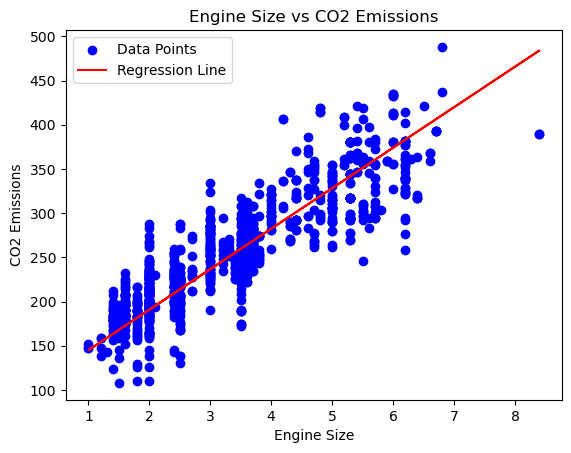

In [9]:

# Plot regression line
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, final_theta_0 + final_theta_1 * X, color='red', label='Regression Line')
plt.xlabel('Engine Size')
plt.ylabel('CO2 Emissions')
plt.title('Engine Size vs CO2 Emissions')
plt.legend()
plt.show()